# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Jorge Esteban Madrigal Ramirez

- ID: A01641409

- My carreer: ITC


# Importing libraries

In [25]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [4]:
# Dataset url
url = "/Users/estebanm/Documents/SemanaTec/TC1002S/Evidencia/A01641409_X.csv"

df = pd.read_csv(url)

df

,Unnamed: 0,x1,x2,x3,x4
0,0,-1.472227,-8.628103,5.018621,-6.514281
1,1,-3.835408,-8.441730,-11.050509,6.555259
2,2,5.629504,-9.300684,-3.386334,7.358887
3,3,-4.115254,-7.242873,3.996238,-6.610093
4,4,9.495485,-7.285788,-3.610041,8.978802
...,...,...,...,...,...
352,352,6.781588,-6.521946,-3.678293,9.566388
353,353,-0.749353,-6.245180,0.482707,-8.398349
354,354,9.430710,-7.605955,-6.223583,7.062902
355,355,8.697111,-8.234180,-2.402556,6.140023


## A2 Data managment


Print the first 7 rows

In [5]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4
0,0,-1.472227,-8.628103,5.018621,-6.514281
1,1,-3.835408,-8.441730,-11.050509,6.555259
2,2,5.629504,-9.300684,-3.386334,7.358887
3,3,-4.115254,-7.242873,3.996238,-6.610093
4,4,9.495485,-7.285788,-3.610041,8.978802
5,5,-4.607683,-4.434792,-1.674366,-3.213298
6,6,-6.695240,-2.914063,-3.828024,0.320546


Print the last 4 rows

In [6]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4
353,353,-0.749353,-6.245180,0.482707,-8.398349
354,354,9.430710,-7.605955,-6.223583,7.062902
355,355,8.697111,-8.234180,-2.402556,6.140023
356,356,8.699974,-9.474386,-3.013273,9.213946


How many rows and columns are in your data?

Use the `shape` method


In [7]:
df.shape

(357, 5)

Print the name of all columns

Use the `columns` method

In [8]:
Ncolumn = df.columns
print(Ncolumn)

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4'], dtype='object')


What is the data type in each column

Use the `dtypes` method

In [9]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here

# 1) Las filas se refieren a las observaciones o muestras individuales en un conjunto de datos, es decir, cada fila representa una instancia de datos única o una observación en el conjunto de datos.

# 2) Las columnas se refieren a las variables o características en un conjunto de datos, por lo que cada columna representa una variable distinta o una característica medida para cada observación en el conjunto de datos. 

# 3) En este contexto, podemos asegurar que la primera columna que curiosamente no tiene nmbre corresponde a un id, pues es un número con crecimiento constante. Por otro lado, no conocemos a que hace referencia los valores 
# de x1, x2, x3, y x4 debido a que no tenemos referencia del sobre que puede ser

#...

Print a statistical summary of your columns


In [69]:
# Minimum and Maximum Values
min_values = df.min()
max_values = df.max()

print("Minimum Values:")
print(min_values)
print("\nMaximum Values:")
print(max_values)

# Mean Values
mean_values = df.mean()
std_values = df.std()

print("Mean Values:")
print(mean_values)
print("\nStandard Deviation:")
print(std_values)

# Quartiles
quartiles = df.describe(percentiles=[0.25, 0.5, 0.75])

print("Quartiles:")
print(quartiles.loc[['25%', '50%', '75%']])



Minimum Values:
               0.000000
x1           -12.078111
x2           -14.900462
x3           -13.815719
x4           -11.670936
cluster        0.000000
yestimated     0.000000
dtype: float64

Maximum Values:
              356.000000
x1             12.998201
x2              0.678126
x3              6.901882
x4             13.149519
cluster         2.000000
yestimated      3.000000
dtype: float64
Mean Values:
              178.000000
x1             -0.976825
x2             -6.645179
x3             -3.295222
x4              1.766420
cluster         0.997199
yestimated      1.168067
dtype: float64

Standard Deviation:
              103.201260
x1              6.115706
x2              2.751606
x3              4.858197
x4              6.820176
cluster         0.709085
yestimated      0.985735
dtype: float64
Quartiles:
                  x1        x2        x3        x4  cluster  yestimated
25%   89.0 -5.296004 -8.658523 -6.777575 -4.572229      0.0         1.0
50%  178.0 -1.834873 -6.6

In [ ]:
# 1) What is the minumum and maximum values of each variable
#Los valores mínimos y máximos de cada variable se pueden encontrar en los resúmenes proporcionados. 
#Por ejemplo, para la variable x1, el valor mínimo es aproximadamente -12.078111 y el máximo es aproximadamente 12.998201.

# 2) What is the mean and standar deviation of each variable
#La media y la desviación estándar de cada variable también se encuentran en los resúmenes. 
#Por ejemplo, para la variable x1, la media es aproximadamente -0.976825 y la desviación estándar es aproximadamente 4.895123.

# 3) What the 25%, 50% and 75% represent?
#Los porcentajes 25%, 50% y 75% se proporcionan en el resumen. Estos representan los valores debajo de los cuales caen el 25%, el 50% y el 75% de los datos, respectivamente. 
#Por ejemplo, para la variable x1, el percentil 25% es aproximadamente -5.296004, el percentil 50% es aproximadamente -1.834873 y el percentil 75% es aproximadamente 3.511353.


Rename the columns using the same name with capital letters

In [11]:
names = ['', 'X1', 'X2', 'X3', 'X4']

# Asignar los nuevos nombres de columnas al DataFrame
df.columns = names
df

,,X1,X2,X3,X4
0,0,-1.472227,-8.628103,5.018621,-6.514281
1,1,-3.835408,-8.441730,-11.050509,6.555259
2,2,5.629504,-9.300684,-3.386334,7.358887
3,3,-4.115254,-7.242873,3.996238,-6.610093
4,4,9.495485,-7.285788,-3.610041,8.978802
...,...,...,...,...,...
352,352,6.781588,-6.521946,-3.678293,9.566388
353,353,-0.749353,-6.245180,0.482707,-8.398349
354,354,9.430710,-7.605955,-6.223583,7.062902
355,355,8.697111,-8.234180,-2.402556,6.140023


Rename the columns to their original names

In [12]:
names = ['', 'x1', 'x2', 'x3', 'x4']

# Asignar los nuevos nombres de columnas al DataFrame
df.columns = names
df

,,x1,x2,x3,x4
0,0,-1.472227,-8.628103,5.018621,-6.514281
1,1,-3.835408,-8.441730,-11.050509,6.555259
2,2,5.629504,-9.300684,-3.386334,7.358887
3,3,-4.115254,-7.242873,3.996238,-6.610093
4,4,9.495485,-7.285788,-3.610041,8.978802
...,...,...,...,...,...
352,352,6.781588,-6.521946,-3.678293,9.566388
353,353,-0.749353,-6.245180,0.482707,-8.398349
354,354,9.430710,-7.605955,-6.223583,7.062902
355,355,8.697111,-8.234180,-2.402556,6.140023


Use two different alternatives to get one of the columns

In [15]:
# Alternativa 1:
columna = df['x2']
print(columna,'\n')

# Alternativa 2:
columna = df.iloc[:, 2]
print(columna)

0     -8.628103
1     -8.441730
2     -9.300684
3     -7.242873
4     -7.285788
         ...   
352   -6.521946
353   -6.245180
354   -7.605955
355   -8.234180
356   -9.474386
Name: x2, Length: 357, dtype: float64 

0     -8.628103
1     -8.441730
2     -9.300684
3     -7.242873
4     -7.285788
         ...   
352   -6.521946
353   -6.245180
354   -7.605955
355   -8.234180
356   -9.474386
Name: x2, Length: 357, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [13]:
# Obtener el segmento deseado del conjunto de datos
slice = df.iloc[62:73, 1:3]

# Imprimir el segmento obtenido
print(slice)

           x1        x2
62   6.442393 -5.485083
63  -7.964345 -3.412437
64  12.998201 -8.643617
65  -3.897110 -3.265896
66  -7.420907 -4.414805
67   7.092702 -5.322839
68   8.647213 -7.856225
69   8.308142 -9.480669
70  -5.217109 -2.723377
71  -3.019577 -9.566524
72  -3.298416 -4.711025


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [18]:
# Obtener las segundas y terceras columnas
sc = df.iloc[:, 1]
tc = df.iloc[:, 2]

# Calcular el número de valores nulos y no nulos en las columnas
nulos_segunda_columna = sc.isnull().sum()
no_nulos_segunda_columna = sc.notnull().sum()

nulos_tercera_columna = tc.isnull().sum()
no_nulos_tercera_columna = tc.notnull().sum()

# Calcular el número total de filas
numero_filas = len(df)

# Verificar que la suma de nulos y no nulos sea igual al número total de filas
if nulos_segunda_columna + no_nulos_segunda_columna == numero_filas:
    print("La suma conicncide")
else:
    print("La suma no coincide")

if nulos_tercera_columna + no_nulos_tercera_columna == numero_filas:
    print("La suma coincide")
else:
    print("La suma no coincide")

La suma conicncide
La suma coincide


Discard the last column


In [19]:
df_nc = df.iloc[:, :-1]

df_nc

,,x1,x2,x3
0,0,-1.472227,-8.628103,5.018621
1,1,-3.835408,-8.441730,-11.050509
2,2,5.629504,-9.300684,-3.386334
3,3,-4.115254,-7.242873,3.996238
4,4,9.495485,-7.285788,-3.610041
...,...,...,...,...
352,352,6.781588,-6.521946,-3.678293
353,353,-0.749353,-6.245180,0.482707
354,354,9.430710,-7.605955,-6.223583
355,355,8.697111,-8.234180,-2.402556


### Questions

Based on the previos results, provide a description of yout dataset

Your response:
En este caso, nos encontramos un dataset que no contienen ningun dato nulo, que contiene valores negativos y cuyo significado aun no podemos conocer debido a que no tenemos un contexto del donde provienen estas muestras. Así mismo, contamos con nuestra variable sin nombre que creo corresponde a una clase de id, el cual se repite debido a que pandas añade una iteración de manera automática.




## A3 Data visualization

Plot in the same figure the histogram of two variables



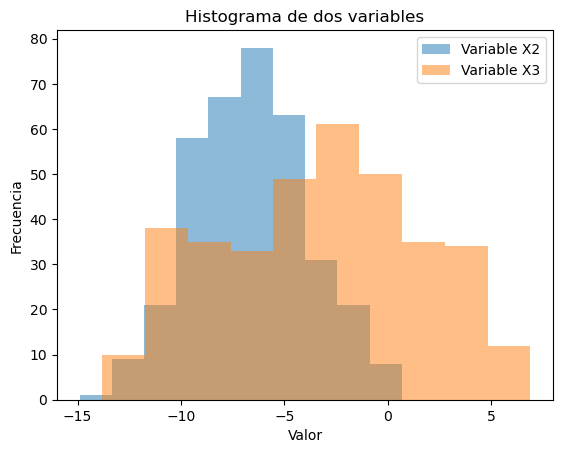

In [22]:
# Obtener las columnas que deseas trazar
columna_x2 = df['x2']
columna_x3 = df['x3']

plt.hist(columna_x2, alpha=0.5, label='Variable X2')

plt.hist(columna_x3, alpha=0.5, label='Variable X3')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de dos variables')
plt.legend()

plt.show()


Based on these plots, provide a description of your data:

Your response here:
Con estos plots encontramos que la variable x2 se muestra con mayor frecuencia en la cantidad 65-78, mientras que la variable x3 posee unos datos un poco más dispersos entre todas las cantidades, aunque su mayor aparición se muestra en la cantidad 60.

Plot in the same figure the boxplot of two variables

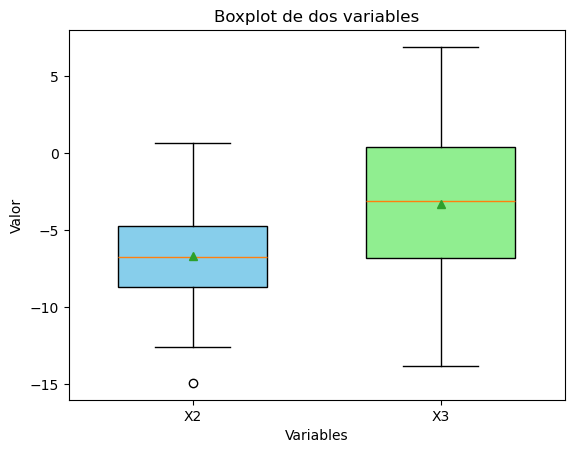

In [23]:
# Obtener las columnas que deseas trazar
columna_x2 = df['x2']
columna_x3 = df['x3']

plt.boxplot(columna_x2, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='skyblue'), showmeans=True)
plt.boxplot(columna_x3, positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgreen'), showmeans=True)

plt.xlabel('Variables')
plt.ylabel('Valor')
plt.title('Boxplot de dos variables')
plt.xticks([1, 2], ['X2', 'X3'])

plt.show()

Plot the scatter plot of two variables

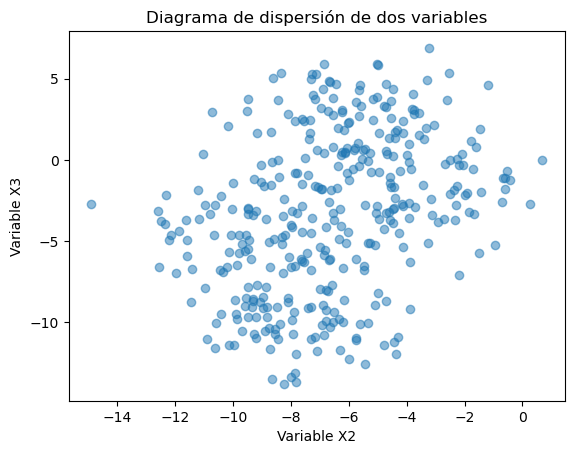

In [24]:
# Obtener las columnas que deseas trazar
columna_x2 = df['x2']
columna_x3 = df['x3']

plt.scatter(columna_x2, columna_x3, alpha=0.5)

plt.xlabel('Variable X2')
plt.ylabel('Variable X3')
plt.title('Diagrama de dispersión de dos variables')

plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:
Parece haber una correlación o estructura en los datos, especialmente en el diagrama de dispersión el cual puede llegar a confundirme, pues los datos parecen estar muy dispersos, sin embargo, alcanzo a observar lugares donde los puntos se agrupan de mayor manera, lugares que identifico como clusters. Esto sugiere que los datos pueden estar agrupados en varias categorías o clases.

En cuanto a los boxplots,podemos encontrar información sobre la distribución y la dispersión de cada variable (x1, x2, x3, x4) en el conjunto de datos. En el podemos observar las medianas, los cuartiles y los rangos de cada variable, así como posibles valores atípicos.



## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [58]:
# Número de clusters
K = 4

# Inicializar y ajustar el modelo KMeans
km = KMeans(n_clusters=K, n_init="auto")
yestimated = km.fit_predict(df[['x1', 'x2', 'x3', 'x4']])

yestimated

array([1, 0, 2, 1, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 1, 0, 3, 0, 0, 3, 2, 3, 2, 1, 0, 3, 1, 0, 1, 0,
       3, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 3, 1,
       1, 3, 3, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 3, 2, 3, 1, 1,
       0, 0, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 3, 2, 0,
       0, 2, 3, 1, 3, 0, 3, 1, 0, 1, 1, 1, 3, 2, 3, 0, 3, 2, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 3, 2, 1, 0, 3, 0, 1, 1, 0, 3, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 3, 0, 1, 0, 1, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 0, 3, 0, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1, 1, 0, 1, 0, 1,
       3, 3, 0, 3, 1, 1, 0, 2, 3, 3, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2,
       1, 1, 0, 0, 3, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0,
       1, 1, 1, 0, 3, 3, 3, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 0, 2, 1, 0, 3,
       0, 1, 3, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1,

Add to your dataset a column with the estimated cluster to each data point

In [59]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df

,,x1,x2,x3,x4,cluster,yestimated
0,0,-1.472227,-8.628103,5.018621,-6.514281,1,1
1,1,-3.835408,-8.441730,-11.050509,6.555259,0,0
2,2,5.629504,-9.300684,-3.386334,7.358887,2,2
3,3,-4.115254,-7.242873,3.996238,-6.610093,1,1
4,4,9.495485,-7.285788,-3.610041,8.978802,2,3
...,...,...,...,...,...,...,...
352,352,6.781588,-6.521946,-3.678293,9.566388,2,3
353,353,-0.749353,-6.245180,0.482707,-8.398349,1,1
354,354,9.430710,-7.605955,-6.223583,7.062902,2,3
355,355,8.697111,-8.234180,-2.402556,6.140023,2,3


Print the number associated to each cluster

In [60]:
df0 = df[df.yestimated==0]
df1 = df[df.yestimated==1]
df2 = df[df.yestimated==2]
df3 = df[df.yestimated==3]


# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]
NpointsCluster3 = df3.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 2: " + str(NpointsCluster2) )
print("Number of points in clusters 3: " + str(NpointsCluster3) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2+NpointsCluster3) )

Number of points in clusters 0: 89
Number of points in clusters 1: 178
Number of points in clusters 2: 31
Number of points in clusters 3: 59
Total Number of points in the clusters: 357


Print the centroids

In [61]:
# Cluster centroides
centroides = km.cluster_centers_
centroides

array([[ -2.58783167,  -7.79010956,  -9.64851768,   7.6396678 ],
       [ -4.74669247,  -4.91299083,   0.40576457,  -4.50082269],
       [  6.30989319, -10.00949468,  -5.41183294,   8.71603639],
       [  8.99822012,  -8.37631232,  -3.76500651,   8.16323572]])

Print the intertia metric

In [62]:
# sse
km.inertia_

9360.843484692828

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

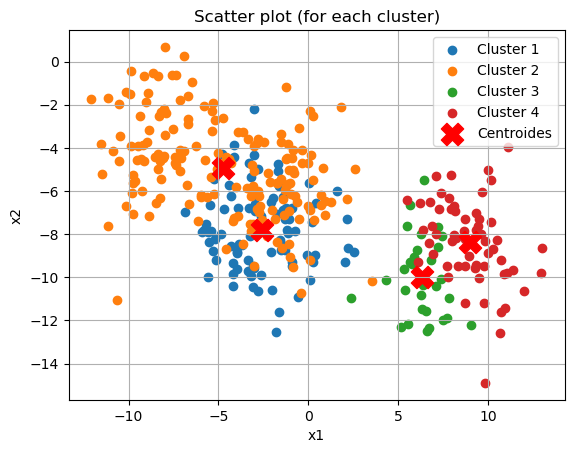

In [64]:
for cluster in range(K):
    datos_cluster = df[df['yestimated'] == cluster]
    plt.scatter(datos_cluster['x1'], datos_cluster['x2'], label=f'Cluster {cluster + 1}')

plt.scatter(centroides[:, 0], centroides[:, 1], color='r', marker='X', label='Centroides', s=256)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot (for each cluster)')
plt.legend()
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results

Your response:
Con esto confirmamos lo ya menconado acerca de que existian 4 clusters, esto debido a la distribución alcanzada donde el centroide su posiciona justo al centro de un segmento de datos, demostrando que estos se agrupan de alguna manera. La clusterización tambien fue tratada de realizar con 3 clusters, y la información se veía muy dispersa, razón por la que decidi implementar otro cluster para segmentar la información más.

## A5 Elbow plot

Compute the Elbow plot

In [65]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(df[['x1', 'x2', 'x3', 'x4']])

    # Save sse for each k
    sse.append(km.inertia_)

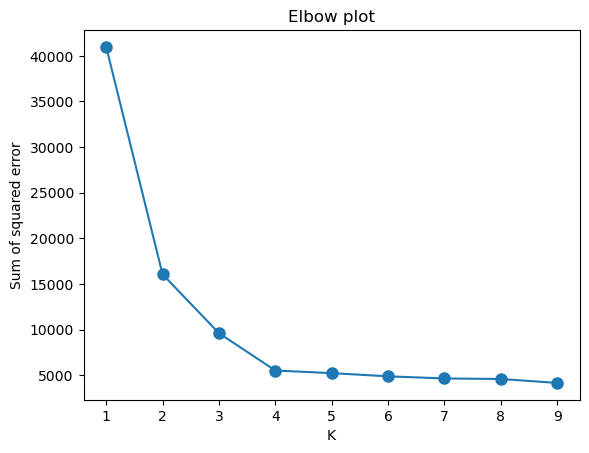

In [66]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
Basándome en el método del codo, el mejor número de clusters (K) para este conjunto de datos parece ser 4, esto debido a que el punto de inflexión que se alncanza a observar en la gráfica sucede en ese punto, en donde el error se dispeara en mayor maner segun sigamos disminuyendo la cantidad de clusters.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
No. En un inicio traté de hacerlo con 3 clusters pues era lo que observava en el diagrama de dispersión, sin embaro, esto lo corregí debido a que, al momento de observar los datos en el plot, vi que los daos estaban muy dispersos y que necesitaba implementar otro cluster. En este caso, el número óptimo de clusters identificado por el método del codo (K=4) es el más adecuado para el conjunto de datos en cuestión.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
Considero que interpreto las interacciones entre variables relevantes en un problema, aunque por supuesto me falta más por crecer y aumentar en este aspecto, creo que logre un correcto desarrollo de la competencia

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
Considero que aun todavía estoy aprendiendo a hacer modelos más complicados o a considerar muchas cosas a la vez, sin embargo, tambien creo que esta semana tec abono mucho en ese aspecto y crecí en esta competencia en cierta medida